In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read in data
cleaned_df = pd.read_csv("Data/survey_df.csv")
cleaned_df

,id,Age,Gender,Country,state,self_employed,family_history,treatment,remote_work,tech_company
0,0,37,Female,United States,IL,No,No,Yes,No,Yes
1,1,44,Male,United States,IN,No,No,No,No,No
2,2,32,Male,Others,Non US,No,No,No,No,Yes
3,3,31,Male,Others,Non US,No,Yes,Yes,No,Yes
4,4,31,Male,United States,TX,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
1238,1254,26,Male,Others,Non US,No,No,Yes,No,Yes
1239,1255,32,Male,United States,IL,No,Yes,Yes,Yes,Yes
1240,1256,34,Male,United States,CA,No,Yes,Yes,No,Yes
1241,1257,46,Female,United States,NC,No,No,No,Yes,Yes


## Preprocessing for machine learning

In [23]:
cleaned_df = cleaned_df.drop(columns=["state", "id"])
cleaned_df

,Age,Gender,Country,self_employed,family_history,treatment,remote_work,tech_company
0,37,Female,1,0,0,Yes,0,1
1,44,Male,1,0,0,No,0,0
2,32,Male,0,0,0,No,0,1
3,31,Male,0,0,1,Yes,0,1
4,31,Male,1,0,0,No,1,1
...,...,...,...,...,...,...,...,...
1238,26,Male,0,0,0,Yes,0,1
1239,32,Male,1,0,1,Yes,1,1
1240,34,Male,1,0,1,Yes,0,1
1241,46,Female,1,0,0,No,1,1


In [4]:
cleaned_df["Country"] = cleaned_df["Country"].map({"United States":1, "Others":0})
cleaned_df["Country"].value_counts()

1    737
0    506
Name: Country, dtype: int64

In [5]:
cleaned_df["self_employed"] = cleaned_df["self_employed"].map({"Yes":1, "No":0})
cleaned_df["self_employed"].value_counts()

0    1101
1     142
Name: self_employed, dtype: int64

In [6]:
cleaned_df["family_history"] = cleaned_df["family_history"].map({"Yes":1, "No":0})
cleaned_df["family_history"].value_counts()

0    759
1    484
Name: family_history, dtype: int64

In [7]:
cleaned_df["remote_work"] = cleaned_df["remote_work"].map({"Yes":1, "No":0})
cleaned_df["remote_work"].value_counts()

0    876
1    367
Name: remote_work, dtype: int64

In [8]:
cleaned_df["tech_company"] = cleaned_df["tech_company"].map({"Yes":1, "No":0})
cleaned_df["tech_company"].value_counts()

1    1018
0     225
Name: tech_company, dtype: int64

In [9]:
# Check to see if dataset is balanced for target class column
cleaned_df["treatment"].value_counts()

Yes    628
No     615
Name: treatment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_labels'

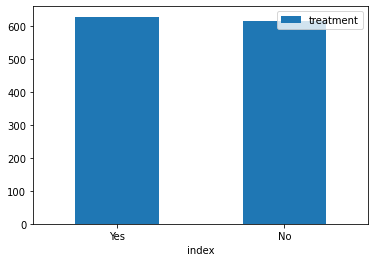

In [54]:
plot_df = pd.DataFrame(cleaned_df["treatment"].value_counts()).reset_index()


ax = plot_df.plot.bar(x='index', y='treatment', rot=0)
ax.bar_labels(ax.containers[0], labels=[f"{x/cleaned_df['treatment'].sum():.0%}" for x in cleaned_df['treatment']], padding=-20, color='w', fontsize=14)
plt.show()

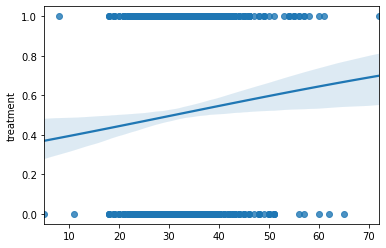

In [14]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Age"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

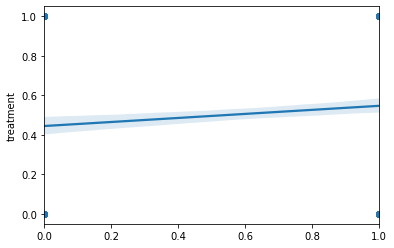

In [15]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Country"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

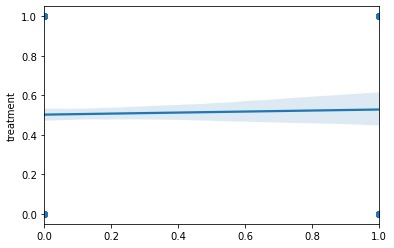

In [16]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["self_employed"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

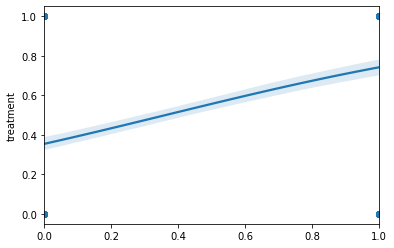

In [17]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["family_history"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

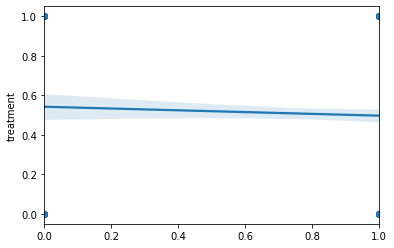

In [18]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["tech_company"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

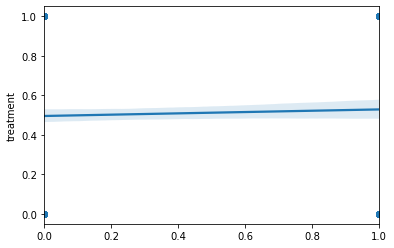

In [19]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["remote_work"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

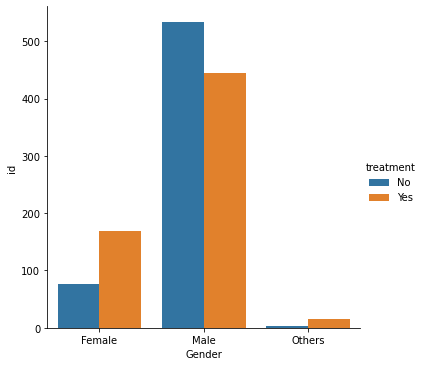

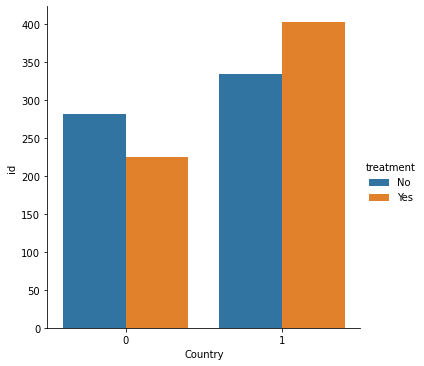

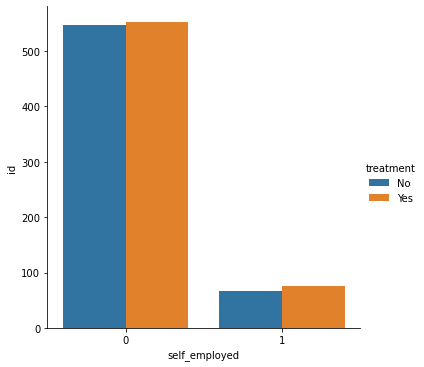

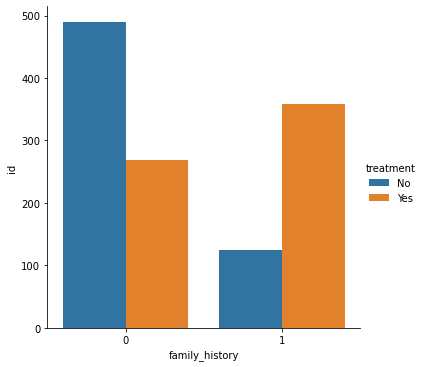

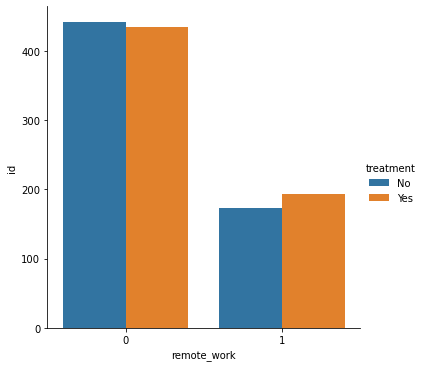

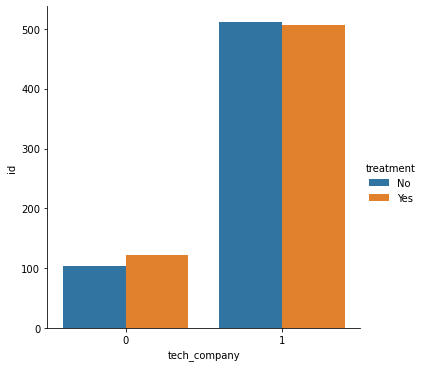

In [20]:
columns = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 'tech_company']

for c in columns:
    
    df_plot = pd.DataFrame(cleaned_df.groupby([c,"treatment"])['id'].count()).reset_index()

    sns.catplot(x = c,       # x variable name
                y = "id",       # y variable name
                hue = "treatment",  # group variable name
                data = df_plot,     # dataframe to plot
                kind = "bar")

In [24]:
# One-hot-encoding for gender
data_df = pd.get_dummies(data=cleaned_df, columns=["Gender"])
data_df

,Age,Country,self_employed,family_history,treatment,remote_work,tech_company,Gender_Female,Gender_Male,Gender_Others
0,37,1,0,0,Yes,0,1,1,0,0
1,44,1,0,0,No,0,0,0,1,0
2,32,0,0,0,No,0,1,0,1,0
3,31,0,0,1,Yes,0,1,0,1,0
4,31,1,0,0,No,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1238,26,0,0,0,Yes,0,1,0,1,0
1239,32,1,0,1,Yes,1,1,0,1,0
1240,34,1,0,1,Yes,0,1,0,1,0
1241,46,1,0,0,No,1,1,1,0,0


In [34]:
# Establish X and y
X = data_df[["Age", "Country", "self_employed", "family_history", "remote_work", "tech_company", "Gender_Female", "Gender_Male", "Gender_Others"]]
y = data_df["treatment"]

In [35]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
# Scale the train and test features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.96078622, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 2.19099151,  0.83154678, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 1.37085465, -1.20257816, -0.35632139, ...,  2.07983516,
        -1.97617387, -0.12789718],
       ...,
       [-0.40610854, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 0.27733884, -1.20257816, -0.35632139, ..., -0.48080734,
         0.50602835, -0.12789718],
       [ 1.50754413,  0.83154678,  2.80645514, ..., -0.48080734,
         0.50602835, -0.12789718]])

## Testing logistic regression

In [37]:
# Initiate logistic regression model
logistic_regression = LogisticRegression()
logistic_regression

LogisticRegression()

In [38]:
# Train the logistic regression model
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
# Make preditions
y_pred_lg = logistic_regression.predict(X_test_scaled)

In [41]:
# Compare training data with test data 
print(f"Training Data Score: {logistic_regression.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression.score(X_test_scaled, y_test)}")

Training Data Score: 0.6952789699570815
Testing Data Score: 0.6784565916398714


In [53]:
# Set the test score to a variable
lg_test_score = logistic_regression.score(X_test_scaled, y_test)
lg_test_score

0.6784565916398714

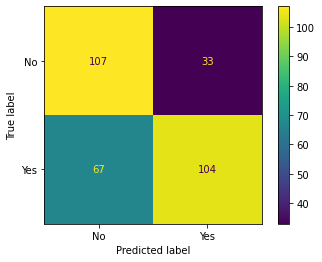

In [44]:
# Create a confusion matrix to illustrate model accuracy
logistic_regression_cm = confusion_matrix(y_test, y_pred_lg, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_cm,
                              display_labels=logistic_regression.classes_)
disp.plot()
plt.show()

## Testing K Nearest Neighbor

k: 1, Train/Test Score: 0.788/0.611
k: 3, Train/Test Score: 0.753/0.617
k: 5, Train/Test Score: 0.735/0.640
k: 7, Train/Test Score: 0.718/0.659
k: 9, Train/Test Score: 0.707/0.682
k: 11, Train/Test Score: 0.710/0.675
k: 13, Train/Test Score: 0.686/0.691
k: 15, Train/Test Score: 0.692/0.695
k: 17, Train/Test Score: 0.695/0.669
k: 19, Train/Test Score: 0.697/0.669


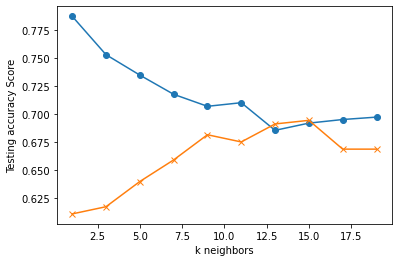

In [46]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [48]:
# Run the model with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

In [50]:
# Make preditions
y_pred_knn = knn.predict(X_test_scaled)

In [49]:
# Compare the training and testing scores
print("k=15")
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k=15
Training Data Score: 0.6920600858369099
Testing Data Score: 0.6945337620578779


In [52]:
knn_test_score = knn.score(X_test_scaled, y_test)
knn_test_score

0.6945337620578779

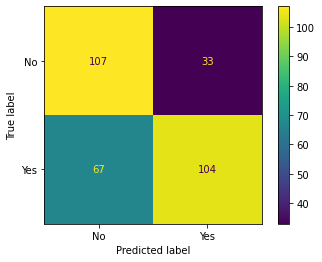

In [51]:
# Create a confusion matrix to illustrate model accuracy
knn_cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## Testing Random Forest

In [64]:
# Initialize and fit the random forest model
random_forest = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)

In [65]:
# Make preditions
y_pred_rf = random_forest.predict(X_test)

In [66]:
# Compare training data with test data 
print(f"Training Data Score: {random_forest.score(X_train, y_train)}")
print(f"Testing Data Score: {random_forest.score(X_test, y_test)}")

Training Data Score: 0.8304721030042919
Testing Data Score: 0.639871382636656


In [67]:
# Assign accuracy score of random forest model to variable
rf_test_score = random_forest.score(X_test, y_test)
rf_test_score

0.639871382636656

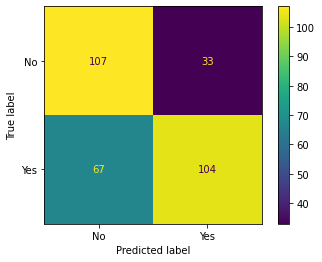

In [68]:
# Create a confusion matrix to illustrate model accuracy
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                              display_labels=random_forest.classes_)
disp.plot()
plt.show()

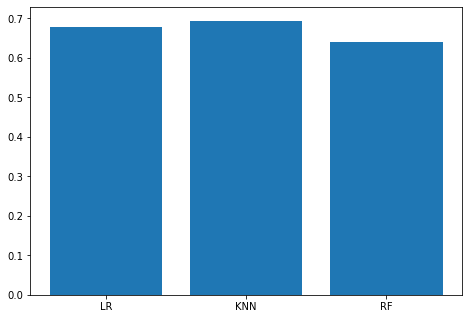

In [70]:
# Bar plot showing test scores for all three models
models = ["LR", "KNN", "RF"]
test_scores = [lg_test_score, knn_test_score, rf_test_score]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,test_scores)
plt.show()

In [ ]:
import pickle